In [1]:
from IPython import get_ipython
ip = get_ipython()
if ip is not None:
    ip.run_line_magic('load_ext', 'pymor.discretizers.builtin.gui.jupyter')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='torch')
import pymor.tools.random
pymor.tools.random._default_random_state = None

The pymor.discretizers.builtin.gui.jupyter extension is already loaded. To reload it, use:
  %reload_ext pymor.discretizers.builtin.gui.jupyter


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sps
from pymor.models.iosys import LTIModel
from pymor.reductors.bt import BTReductor

plt.rcParams['axes.grid'] = True

In [3]:
k = 50
n = 2 * k + 1

E = sps.eye(n, format='lil')
E[0, 0] = E[-1, -1] = 0.5
E = E.tocsc()

d0 = n * [-2 * (n - 1)**2]
d1 = (n - 1) * [(n - 1)**2]
A = sps.diags([d1, d0, d1], [-1, 0, 1], format='lil')
A[0, 0] = A[-1, -1] = -n * (n - 1)
A = A.tocsc()

B = np.zeros((n, 2))
B[:, 0] = 1
B[0, 0] = B[-1, 0] = 0.5
B[0, 1] = n - 1

C = np.zeros((3, n))
C[0, 0] = C[1, k] = C[2, -1] = 1

In [4]:
fom = LTIModel.from_matrices(A, B, C, E=E)

In [5]:
bt = BTReductor(fom)

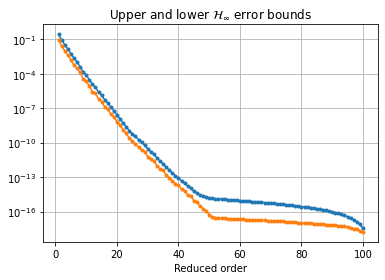

In [6]:
error_bounds = bt.error_bounds()
hsv = fom.hsv()
fig, ax = plt.subplots()
ax.semilogy(range(1, len(error_bounds) + 1), error_bounds, '.-')
ax.semilogy(range(1, len(hsv)), hsv[1:], '.-')
ax.set_xlabel('Reduced order')
_ = ax.set_title(r'Upper and lower $\mathcal{H}_\infty$ error bounds')

In [7]:
rom = bt.reduce(10)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

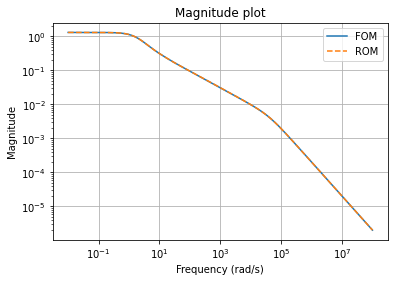

In [8]:
w = np.logspace(-2, 8, 300)
fig, ax = plt.subplots()
fom.mag_plot(w, ax=ax, label='FOM')
rom.mag_plot(w, ax=ax, linestyle='--', label='ROM')
_ = ax.legend()

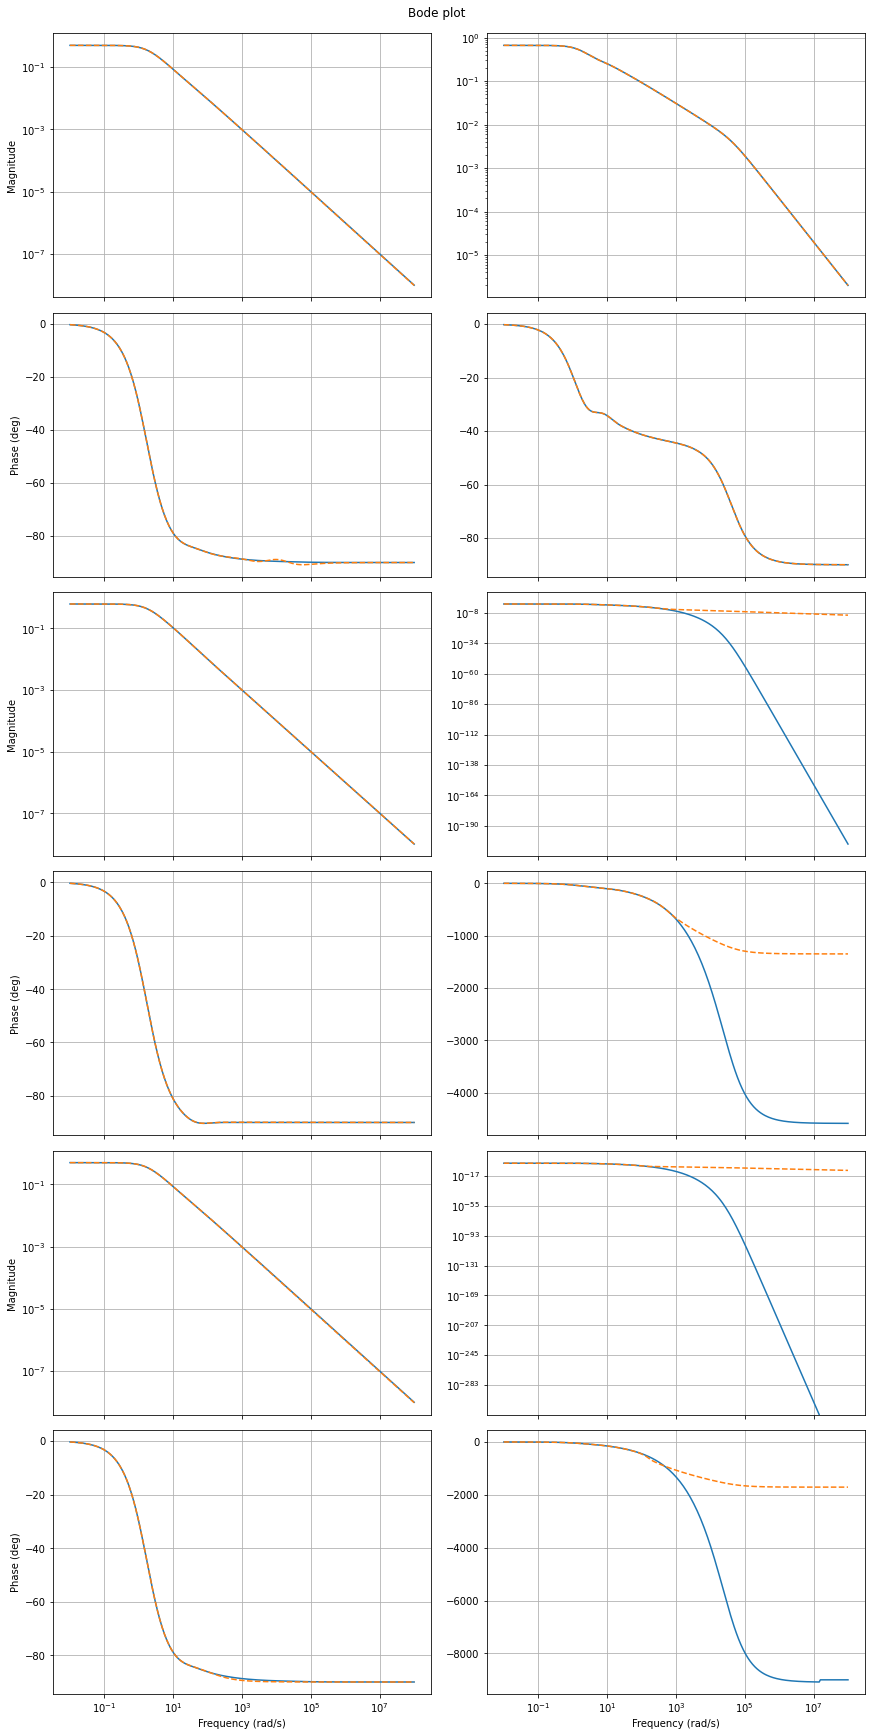

In [9]:
fig, axs = plt.subplots(6, 2, figsize=(12, 24), sharex=True, constrained_layout=True)
fom.bode_plot(w, ax=axs)
_ = rom.bode_plot(w, ax=axs, linestyle='--')

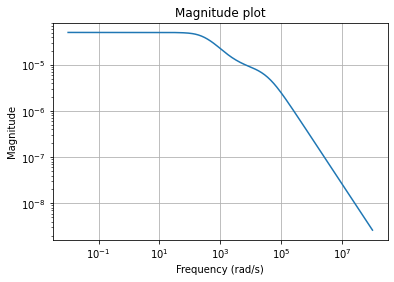

In [10]:
err = fom - rom
_ = err.mag_plot(w)

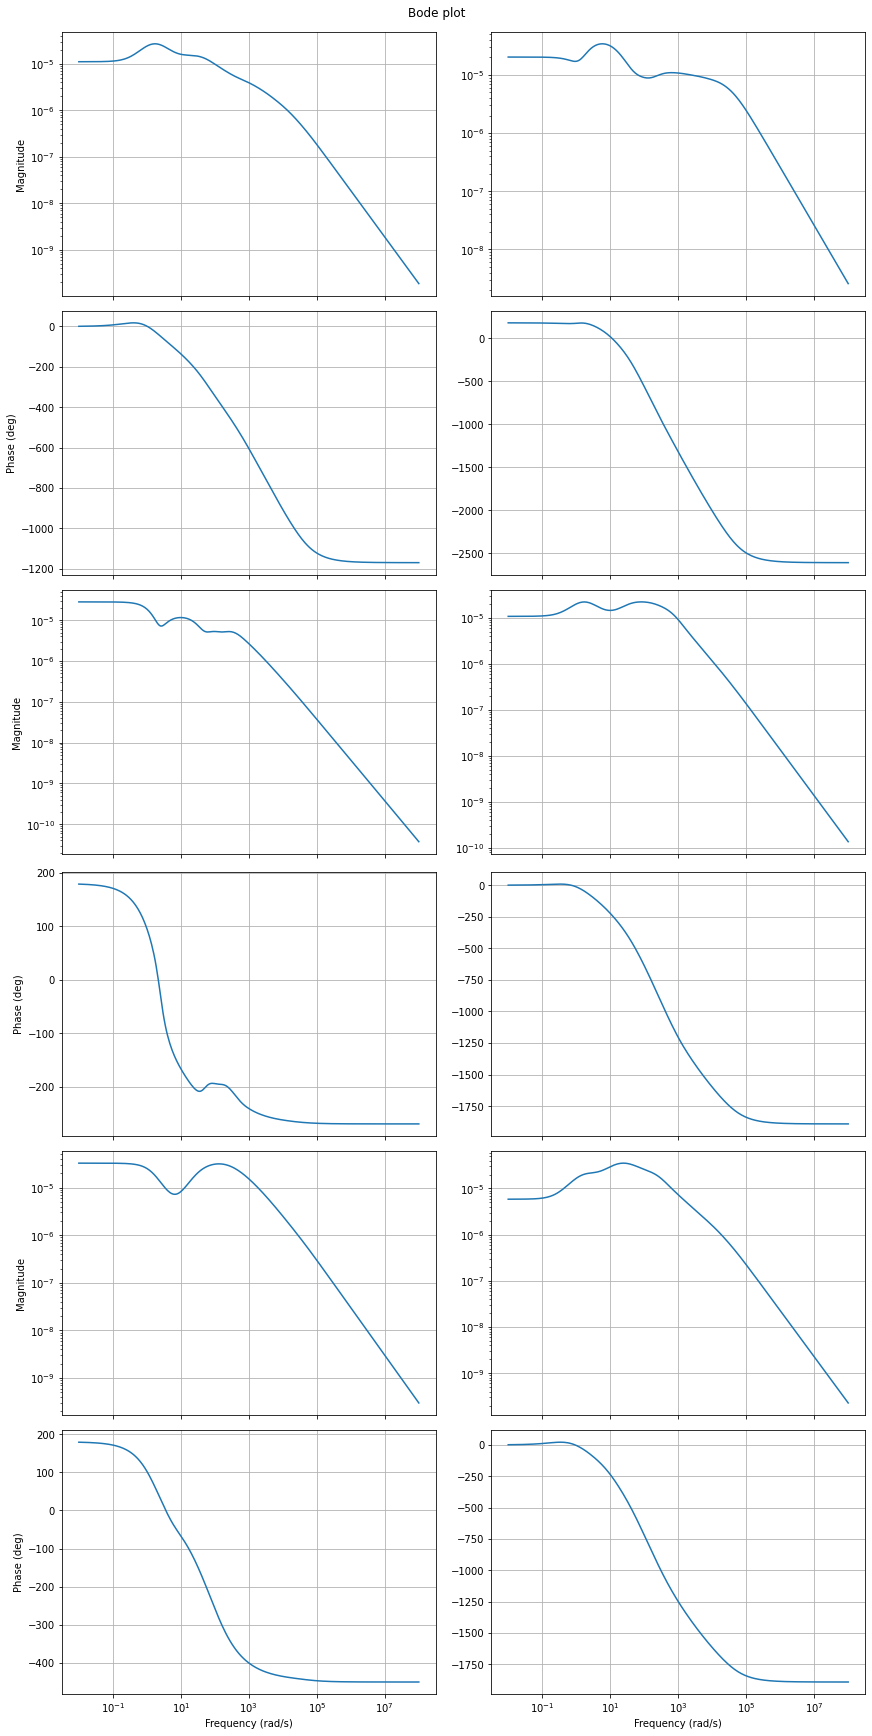

In [11]:
_ = err.bode_plot(w)

In [12]:
print(f'Relative Hinf error:   {err.hinf_norm() / fom.hinf_norm():.3e}')
print(f'Relative H2 error:     {err.h2_norm() / fom.h2_norm():.3e}')
print(f'Relative Hankel error: {err.hankel_norm() / fom.hankel_norm():.3e}')

Relative Hinf error:   3.702e-05
Relative H2 error:     6.399e-04
Relative Hankel error: 7.629e-05
